# Introduction to Statistics

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
                    #loads numpy and matplotlib into the current workspace, and directs matplotlib to show plots “inline”.
import seaborn as sns            #extends the plotting
import matplotlib.pyplot as plt  #is a collection of command style functions
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from statistics import mode
import scipy.stats  as st

In [4]:
from scipy import stats

In [5]:
import statistics

## Importing dataset

In [6]:
df=pd.read_csv('mtcars1.csv')

In [7]:
df.head()

,model,Brand,Origin,mileage,cyl,hp,drat,wt,vs,am,gear,carb,disp
0,Mazda RX4,Mazda,Asian,21.0,6,110,3.90,2.62,0,1,4,4,160.0
1,Mazda RX4 Wag,Mazda,Asian,21.0,6,110,3.90,2.88,0,1,4,4,160.0
2,Datsun 710,Datsun,Asian,22.8,4,93,3.85,2.32,1,1,4,1,108.0
3,Hornet 4 Drive,Hornet,American,21.4,6,110,3.08,3.22,1,0,3,1,258.0
4,Hornet Sportabout,Hornet,American,18.7,8,175,3.15,3.44,0,0,3,2,360.0


## Data Description

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
model      32 non-null object
Brand      32 non-null object
Origin     32 non-null object
mileage    32 non-null float64
cyl        32 non-null int64
hp         32 non-null int64
drat       32 non-null float64
wt         32 non-null float64
vs         32 non-null int64
am         32 non-null int64
gear       32 non-null int64
carb       32 non-null int64
disp       32 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 3.3+ KB


In [9]:
df.describe()

,mileage,cyl,hp,drat,wt,vs,am,gear,carb,disp
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000
mean,20.090625,6.187500,146.687500,3.596563,3.218437,0.437500,0.406250,3.687500,2.8125,230.721875
std,6.026948,1.785922,68.562868,0.534679,0.977944,0.504016,0.498991,0.737804,1.6152,123.938694
min,10.400000,4.000000,52.000000,2.760000,1.510000,0.000000,0.000000,3.000000,1.0000,71.100000
25%,15.425000,4.000000,96.500000,3.080000,2.582500,0.000000,0.000000,3.000000,2.0000,120.825000
50%,19.200000,6.000000,123.000000,3.695000,3.330000,0.000000,0.000000,4.000000,2.0000,196.300000
75%,22.800000,8.000000,180.000000,3.920000,3.610000,1.000000,1.000000,4.000000,4.0000,326.000000
max,33.900000,8.000000,335.000000,4.930000,5.420000,1.000000,1.000000,5.000000,8.0000,472.000000


In [10]:
np.quantile(df.mileage,0.50)

19.2

In [11]:
17.5/2

8.75

## Data Manipulation

In [17]:
df['carb1']=df['carb']

In [140]:
df.loc[df['carb'] == 1, ['carb1']] = '1'
df.loc[df['carb'] == 2, ['carb1']] = '2'
df.loc[df['carb'] >= 3, ['carb1']] = ">=3"

In [141]:
df.head()

,model,Brand,Origin,mileage,cyl,hp,drat,wt,vs,am,gear,carb,disp,carb1,disp1
0,Mazda RX4,Mazda,Asian,21.0,6,110,3.90,2.62,0,1,4,4,160.0,>=3,150-300
1,Mazda RX4 Wag,Mazda,Asian,21.0,6,110,3.90,2.88,0,1,4,4,160.0,>=3,150-300
2,Datsun 710,Datsun,Asian,22.8,4,93,3.85,2.32,1,1,4,1,108.0,1,<=150
3,Hornet 4 Drive,Hornet,American,21.4,6,110,3.08,3.22,1,0,3,1,258.0,1,150-300
4,Hornet Sportabout,Hornet,American,18.7,8,175,3.15,3.44,0,0,3,2,360.0,2,>300


In [22]:
df['disp1']=df['disp']

In [23]:
df.loc[df['disp'] <= 150, ['disp1']] = "<=150"
df.loc[df['disp'] > 300, ['disp1']] = ">300"
df.loc[(df['disp'] > 150) & (df['disp']<=300), ['disp1']] = "150-300"

In [24]:
df.head()

,model,Brand,Origin,mileage,cyl,hp,drat,wt,vs,am,gear,carb,disp,carb1,disp1
0,Mazda RX4,Mazda,Asian,21.0,6,110,3.90,2.62,0,1,4,4,160.0,>=3,150-300
1,Mazda RX4 Wag,Mazda,Asian,21.0,6,110,3.90,2.88,0,1,4,4,160.0,>=3,150-300
2,Datsun 710,Datsun,Asian,22.8,4,93,3.85,2.32,1,1,4,1,108.0,1,<=150
3,Hornet 4 Drive,Hornet,American,21.4,6,110,3.08,3.22,1,0,3,1,258.0,1,150-300
4,Hornet Sportabout,Hornet,American,18.7,8,175,3.15,3.44,0,0,3,2,360.0,2,>300


## Barplot on ordinal

### Barplot of Gear

In [25]:
items = df.gear.unique()
x=sorted(items)

In [26]:
x

[3, 4, 5]

In [27]:
y=[]
y.append(df['gear'][df['gear']==3].count())
y.append(df['gear'][df['gear']==4].count())
y.append(df['gear'][df['gear']==5].count())

Text(0.5, 1.0, 'Barplot of Gear')

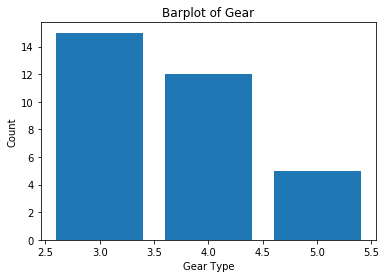

In [28]:
plt.bar(x,y)
plt.xlabel('Gear Type')
plt.ylabel('Count')
plt.title('Barplot of Gear')

### Barplot of Carburetors

In [29]:
items = df.carb.unique()
x=sorted(items)
x

[1, 2, 3, 4, 6, 8]

In [30]:
y=[]
for i in x:
    y.append(df['carb'][df['carb']==i].count())
print(y)  

[7, 10, 3, 10, 1, 1]


Text(0.5, 1.0, 'Barplot of Carb')

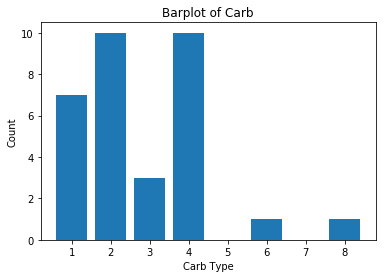

In [31]:
plt.bar(x,y)
plt.xlabel('Carb Type')
plt.ylabel('Count')
plt.title('Barplot of Carb')

### Barplot of Transmission (Automatic/Manual) variable

In [32]:
df.am.value_counts()

0    19
1    13
Name: am, dtype: int64

In [33]:
df.am.value_counts().values

array([19, 13], dtype=int64)

Text(0.5, 1.0, 'Barplot of AM')

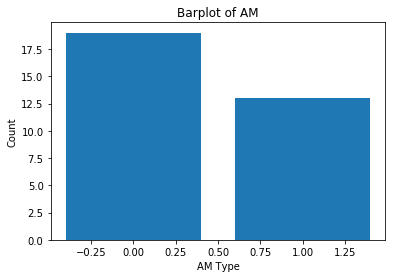

In [34]:
x=(df.am.unique())
plt.bar(sorted(x),df.am.value_counts().values)
plt.xlabel('AM Type')
plt.ylabel('Count')
plt.title('Barplot of AM')

## Pie chart of Model Brand

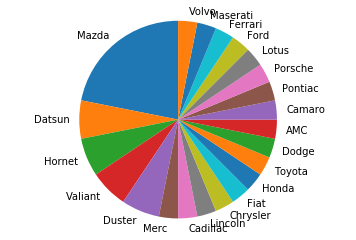

In [35]:
labels = list(df.Brand.unique())
sizes = df.Brand.value_counts().values

# Plot
plt.pie(sizes,  
        labels=labels, 
        startangle=90)

plt.axis('equal')
plt.show()

## Histogram, mean, median, mode, std, var, range, IQR


### For HP

In [36]:
def range1(m):
    l1=list(m)
    maxn=max(l1)
    minn=min(l1)
    dif=maxn-minn
    return ('Range :',dif)

In [37]:
range1(df.hp)

('Range :', 283)

In [38]:
print('Mean of HP : ', np.mean(df.hp))
print('Median of HP : ',np.median(df.hp))
print('Standard Deviation of HP : ',np.std(df.hp))
print('Variance of HP : ',np.var(df.hp))
print('IQR of HP : ',st.iqr(df.hp))

Mean of HP :  146.6875
Median of HP :  123.0
Standard Deviation of HP :  67.48307079371833
Variance of HP :  4553.96484375
IQR of HP :  83.5


Text(0.5, 1.0, 'Histogram of HP')

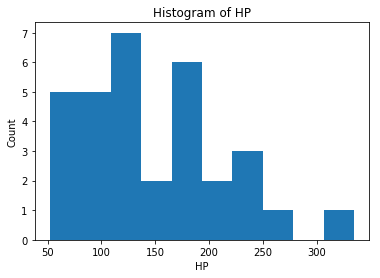

In [39]:
# Histogram of HP
plt.hist(df.hp,)
plt.xlabel("HP")
plt.ylabel("Count")
plt.title("Histogram of HP")

### For Mileage

In [40]:
range1(df.mileage)

('Range :', 23.5)

In [41]:
print('Mean of Mileage : ', np.mean(df.mileage))
print('Median of Mileage : ',np.median(df.mileage))
print('Standard Deviation of Mileage : ',np.std(df.mileage))
print('Variance of Mileage : ',np.var(df.mileage))
print('IQR of Mileage : ',st.iqr(df.mileage))

Mean of Mileage :  20.090624999999996
Median of Mileage :  19.2
Standard Deviation of Mileage :  5.932029552301219
Variance of Mileage :  35.188974609375
IQR of Mileage :  7.375


Text(0.5, 1.0, 'Histogram of Mileage')

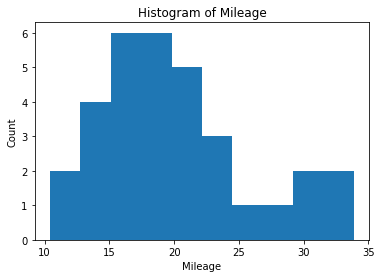

In [42]:
# Histogram of HP
plt.hist(df.mileage,)
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.title("Histogram of Mileage")

## Scatter plot of Mileage vs HorsePower

Text(0.5, 1.0, 'Mileage vs HorsePower')

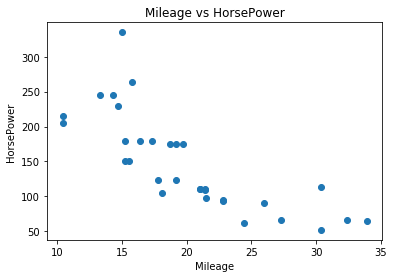

In [43]:
plt.scatter(df.mileage, df.hp)
plt.xlabel('Mileage')
plt.ylabel('HorsePower ')
plt.title('Mileage vs HorsePower')

## Correlation Coefficient

In [44]:
df2=df[['mileage','hp']]
df2.corr()

,mileage,hp
mileage,1.000000,-0.776168
hp,-0.776168,1.000000


In [45]:
np.corrcoef(df.mileage,df.hp)

array([[ 1.        , -0.77616837],
       [-0.77616837,  1.        ]])

## Boxplot

### Cylinder vs HP

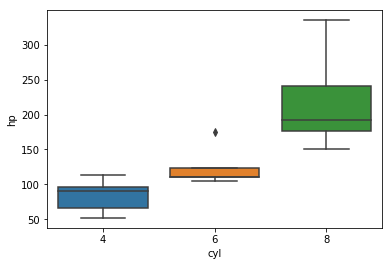

In [46]:
ax = sns.boxplot(x=df.cyl,y=df.hp, data=df)

### Cylinder vs Mileage

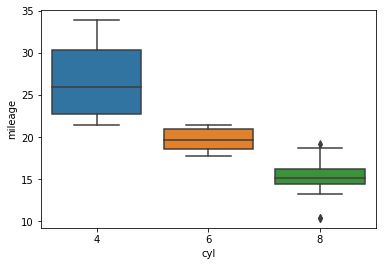

In [47]:
ax = sns.boxplot(x=df.cyl,y=df.mileage, data=df)

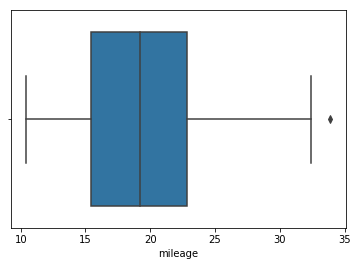

In [48]:
ax = sns.boxplot(x=df.mileage, data=df,)

[array([15.425, 10.4  ]), array([22.8, 32.4])]

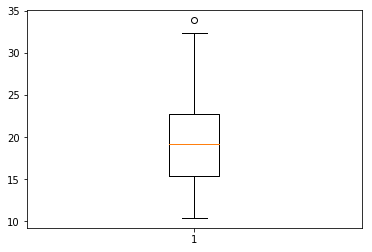

In [49]:
B=plt.boxplot(df.mileage)
[item.get_ydata() for item in B['whiskers']]

### Gear vs HP

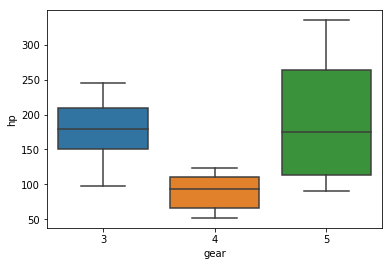

In [50]:
ax = sns.boxplot(x=df.gear,y=df.hp, data=df)

In [139]:
#ax = sns.lineplot(x=df.cyl, y=df.mileage, 
                  #hue="event",
 #                 data=df)

## Violin Plot

### Cylinder vs Mileage

Text(0.5, 1.0, 'Violin plot Cylinder vs Mileage')

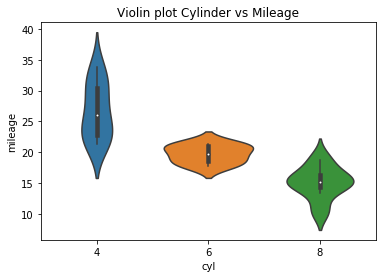

In [52]:
sns.violinplot(x=df.cyl, y=df.mileage, hue=None, data=df)
plt.title('Violin plot Cylinder vs Mileage')

### Gear vs HP

Text(0.5, 1.0, 'Violin plot Gear vs HP')

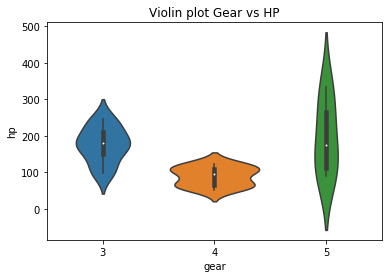

In [53]:
sns.violinplot(x=df.gear, y=df.hp, hue=None, data=df)
plt.title('Violin plot Gear vs HP')

## Distribution Plot

### Gear vs Mileage

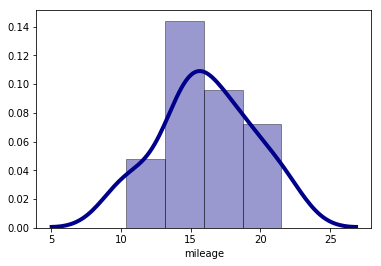

In [54]:
sns.distplot(df['mileage'][df['gear'] == 3], hist=True, kde=True, 
             #bins=int(180/5), 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'Frequency')

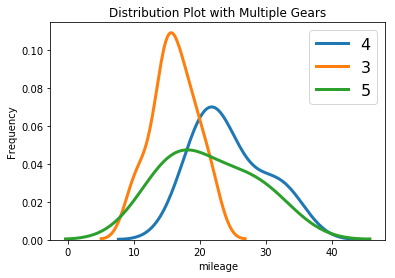

In [55]:

x = list(df.gear.unique())


for i in x:
    # Subset to different values of gear
    subset = df['mileage'][df['gear'] == i]
    
    # Draw the distribution plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Distribution Plot with Multiple Gears')
plt.ylabel('Frequency')

## 1 Sample t-Test

In [56]:
# one-tailed,
m = 17
results = stats.ttest_1samp(df['mileage'], m)
alpha = 0.05
if (results[0] > stats.t.ppf(1-0.025,len(df)-1 )) & (results[1]/2 <alpha):
    print ("reject null hypothesis ")
else:
    print ("accept null hypothesis")
    


reject null hypothesis 


In [57]:
stats.ttest_1samp(df['mileage'], 17)

Ttest_1sampResult(statistic=2.900840527201366, pvalue=0.006788310015667826)

In [58]:
np.mean(df.mileage)

20.090624999999996

## 2 sample t test  (AM and mileage)

In [132]:
stats.ttest_rel(df['am'], df['mileage'])  

Ttest_relResult(statistic=-19.39405182846851, pvalue=6.825464424626788e-19)

In [133]:
stats.ttest_ind(df['am'], df['mileage'], equal_var=False)

Ttest_indResult(statistic=-18.41262734774658, pvalue=2.1512276713623853e-18)

## 1 proportion test (for american (filter from origin) cars, am = 0.5)

In [81]:
from statsmodels.stats.proportion import proportions_ztest


In [ ]:
count=df['Origin'][df['Origin']=='American'].count
am= df['am'][df['Origin']=='American']

In [87]:
stat, pval = proportions_ztest(10, 11, 0.5)
print(stat,pval)

4.719639816765681 2.3626260806619793e-06


## 2 proportion test (american and european cars vs VS)

In [143]:
from statsmodels.stats.proportion import proportions_ztest

In [148]:
g = df.groupby(['Origin']) 
g.first()

,model,Brand,mileage,cyl,hp,drat,wt,vs,am,gear,carb,disp,carb1,disp1
Origin,,,,,,,,,,,,,,
American,Hornet 4 Drive,Hornet,21.4,6,110,3.08,3.22,1,0,3,1,258.0,1,150-300
Asian,Mazda RX4,Mazda,21.0,6,110,3.90,2.62,0,1,4,4,160.0,>=3,150-300
European,Duster 360,Duster,14.3,8,245,3.21,3.57,0,0,3,4,360.0,>=3,>300


In [149]:
df.groupby(['Origin', 'vs']).size()

Origin    vs
American  0     9
          1     2
Asian     0     2
          1     4
European  0     7
          1     8
dtype: int64

In [158]:
df.Origin.value_counts()

European    15
American    11
Asian        6
Name: Origin, dtype: int64

In [142]:


count = np.array([9, 7])
nobs = np.array([11, 15])
stat, pval = proportions_ztest(count, nobs)
print(stat,pval)

1.820173151936459 0.06873264033576955


## 1 way ANOVA

### No. of Cylinders vs Mileage

In [134]:
stats.f_oneway(df['mileage'][df['cyl'] == 4], 
             df['mileage'][df['cyl'] == 6],
             df['mileage'][df['cyl'] == 8])

F_onewayResult(statistic=39.697515255869035, pvalue=4.978919174400203e-09)

### Orgin of car vs Mileage

In [135]:
stats.f_oneway(df['mileage'][df['Origin'] == 'Asian'], 
             df['mileage'][df['Origin'] == 'American'],
             df['mileage'][df['Origin'] == 'European'])

F_onewayResult(statistic=7.5272497856097, pvalue=0.0023276196821404595)

## Chi-square (no. of cylinders vs carb1)

In [108]:
chi2_stat, p_val  = st.chisquare( df.cyl.astype(int),df.carb1.astype(int))
print(chi2_stat)
print(p_val)



1467.2
2.7198854556666367e-289


In [77]:
dice = np.array(df[['cyl','carb1']])

In [78]:
df2=df[['cyl','carb1']]

In [110]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(df.cyl.astype(int),df.carb1.astype(int))
print(chi2_stat)
print(p_val)
print(dof)
print(ex)

0.0
1.0
0
[6. 6. 4. 6. 8. 6. 8. 4. 4. 6. 6. 8. 8. 8. 8. 8. 8. 4. 4. 4. 4. 8. 8. 8.
 8. 4. 4. 4. 8. 6. 8. 4.]


In [138]:
#g = sns.factorplot(df.mileage, data=df, aspect=1.5, kind="count", size=4) 

# Appendix

# Measure of Central Tendency

### 1.  Average

In [ ]:
np.mean(df.mileage)

### 2. Median

In [ ]:
np.median(df.mileage)

### 3. Mode

In [ ]:
mode(df.cyl)

In [ ]:
np.std(df.mileage)

In [ ]:
np.var(df.mileage)

# Measure of Variabilty

### 1. Range

In [ ]:
np.arange(0, 33.9,2,)

In [ ]:
max(df.mileage)

In [ ]:
st.iqr(df.mileage)

In [ ]:
print('Mean of HP : ', np.mean(df.hp))
print('Median of HP : ',np.median(df.hp))
print('Standard Deviation of HP : ',np.std(df.hp))
print('Variance of HP : ',np.var(df.hp))
print('IQR of HP : ',st.iqr(df.hp))

In [ ]:
plt.hist(df.mileage) 
plt.title('Histogram of {0}'.format(col))
# plt.xlabel('{0}'.format(col))
# plt.ylabel('Frequecy of {0}'.format(col))

### Percentile and Quartile

In [ ]:

print(df['mpg'].quantile(0.25))
print(df['mpg'].quantile(0.50))
print(df['mpg'].quantile(0.75))

In [ ]:
value = np.random.normal(loc=5,scale=3,size=1000)
sns.distplot(value)

In [ ]:
sns.distplot(df.mpg)

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, )

In [ ]:
plt.plot(df.wt,df.hp)
plt.xlabel('Time[sec]')
plt.ylabel('Values')
plt.savefig(r'..\Sinewave.png', dpi=200)
plt.show()

In [ ]:
st.

In [ ]:
df.columns